In [22]:
import numpy as np
import matplotlib.pyplot as plt


# t0,v0,x0: 初期値
# tmax: tの最大値
# T:制御パラメータ t_0/t_d
def euler_method_2ord(t0, v0, x0, tmax, T, n=12):

    # t0～tmaxを2**n+1個に分割．（この分割の方法は2進数と相性がいいらしい．）
    t = np.linspace(t0, tmax, 2**n + 1)

    # tの刻み幅⊿t
    dt = t[1] - t[0]

    # tと同じ形状の未初期化配列を生成
    v = np.empty_like(t)
    x = np.empty_like(t)

    # v[0]に初期値y0を代入
    v[0] = v0
    x[0] = x0

    # オイラー法でt毎の数値解を計算
    for k in range(len(t) - 1):
        v[k+1] = (1 - T * dt) * v[k] - x[k] * dt
        x[k+1] = (1 - T * dt) * dt * v[k] + (1 - dt * dt) * x[k]
    
    return t, v, x

# 初期値はそれぞれ，t0=0,v0=1,x0=0
# T<2 減衰振動(T=1)
t1, v1, x1 = euler_method_2ord(0, 1, 0, 12, 1, n=16)

# T=2 臨界減衰
t2, v2, x2 = euler_method_2ord(0, 1, 0, 12, 2, n=16)

# T>2 過減衰(T=3)
t3, v3, x3 = euler_method_2ord(0, 1, 0, 12, 3, n=16)

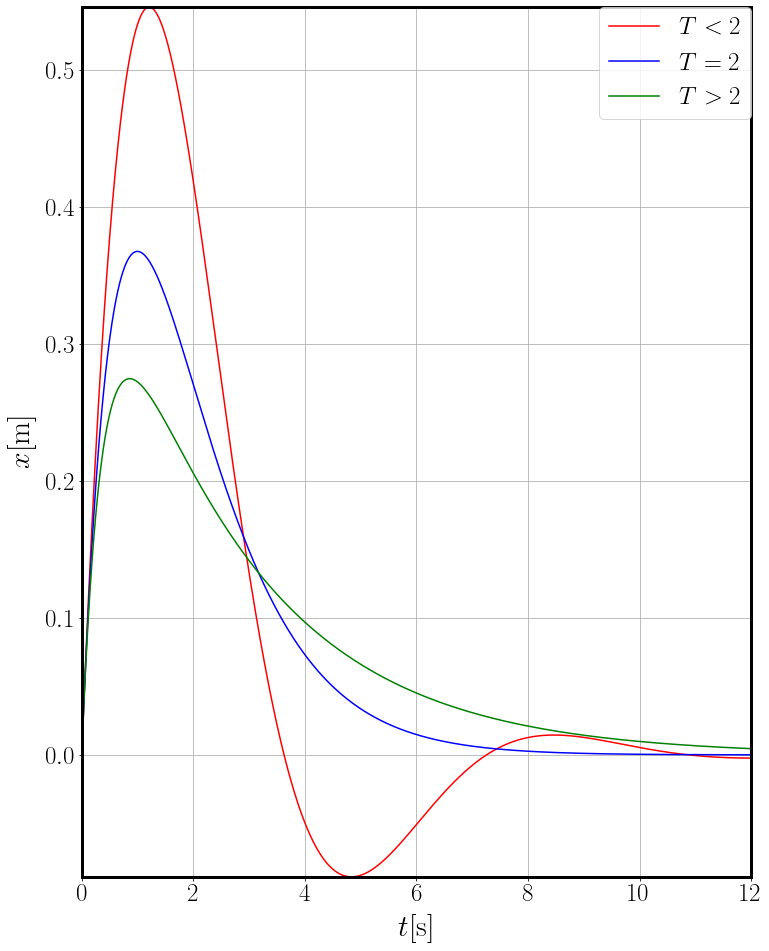

In [24]:
# グラフのプロット

plt.rcParams["text.usetex"] =True

# FigureとAxesの設定
fig, ax = plt.subplots(1, 1, figsize=(12, 16), sharex="col",
                       gridspec_kw=dict(hspace=0.25))


ax.grid()
ax.set_xlim(0, max(t))
ax.set_ylim(min(x1), max(x1))
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
plt.xticks(color='k', size=25)
plt.yticks(color='k', size=25)
ax.set_xlabel(r"$t [\mathrm{s}]$", fontsize=30, labelpad=8)
ax.set_ylabel(r"$x [\mathrm{m}]$", fontsize=30, labelpad=8)
ax.plot(t1, x1, color="red",
           label=r"$T<2$")
ax.plot(t2, x2, color="blue",
           label=r"$T=2$")
ax.plot(t3, x3, color="green",
           label=r"$T>2$")

plt.legend(ncol=1, loc='upper right', borderaxespad=0, fontsize=25)

plt.savefig('oscillation.png')